In [65]:
#installing to balance the imbalance datasets
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shivam\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [66]:
#For Statistical plots
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shivam\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [67]:
#installing for Gradient boosting algorithm impementation
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shivam\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [101]:
#importing all required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
import imblearn

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import f1_score

In [69]:
df = pd.read_csv('E:/TUD Course Content/Sem-2/Machine Learning/Assign#2/datasets/employee-attrition-data/MFG10YearTerminationData.csv')

In [70]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [71]:
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Compensation Analyst                 20
Systems Analyst                      20
Auditor                              20
Investment Analyst                   20
Corporate Lawyer                     17


In [72]:
# The 47 jobs can be separated according to corporate hierarchy
# Use employee, manager, and combined executives and board 
employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

# Check all jobs were entered into the categories
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, 'out of 47')

Total jobs categorised: 47 out of 47


In [73]:
df['Hierarchy'] = df.job_title

In [74]:
#Defining the hierarchy of the jobs according to their position in organization
df.Hierarchy = df.Hierarchy.replace(employee, 0)
df.Hierarchy = df.Hierarchy.replace(manager, 1)
df.Hierarchy = df.Hierarchy.replace(executive, 2)
df.Hierarchy = df.Hierarchy.replace(board, 3)

In [75]:
# The departments can be separated according to whether they serve the customer or the business
serve_cus = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

serve_biz = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

# Check all departments were entered into the categories
total = len(serve_cus) + len(serve_biz)
print('Total departments categorised:', total, 'out of 21')

Total departments categorised: 21 out of 21


In [76]:
df['Service_to'] = df.department_name

# Replace the department names in Service_to
df.Service_to = df.Service_to.replace(serve_cus, 'Customer')
df.Service_to = df.Service_to.replace(serve_biz, 'Business')

In [77]:
df.Service_to.value_counts()

Customer    48797
Business      856
Name: Service_to, dtype: int64

In [78]:
# Convert TARGET VARIABLE from string to numerical
df.STATUS = df.STATUS.map({'ACTIVE':1, 'TERMINATED':0})

In [79]:
# Data visualisation
# Separate data to avoid one excessively overlapping the other in plots.
# One set for the terminated (out of company) and working (in company)

out_of_company = df[df.STATUS == 0]
in_company = df[df.STATUS == 1]

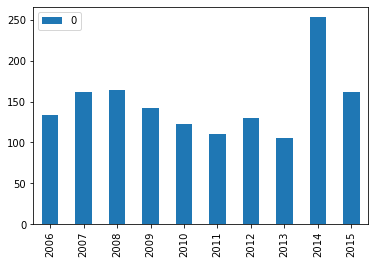

In [80]:
# Out of interest, look at number of terminations per year. Count terminations per year

term_per_year = Counter(out_of_company.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

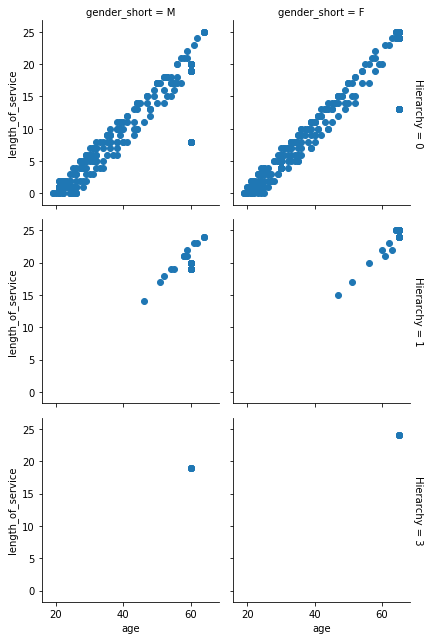

In [81]:
# When someone leaves the company, look at their age, length of service, and position in hierarchy. Separated by gender

g = sns.FacetGrid(out_of_company, col='gender_short', row='Hierarchy', palette='Set1_r', 
                   margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

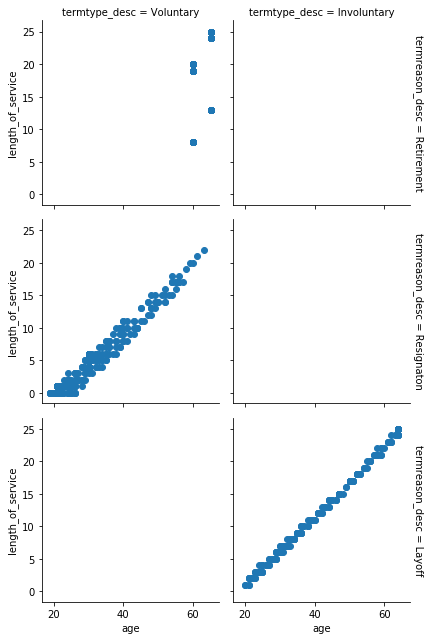

In [82]:
#Look at when termination is voluntary or involuntary
g = sns.FacetGrid(out_of_company, col='termtype_desc', row='termreason_desc', palette='Set1_r', 
                   margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

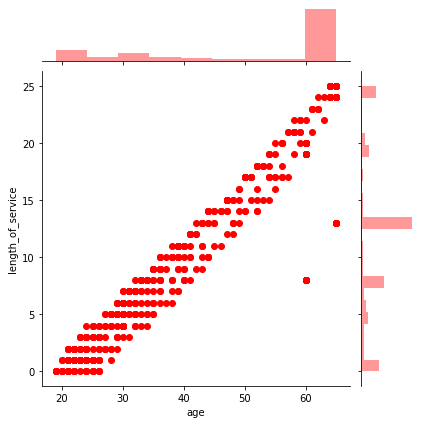

In [83]:
# Figuring out the people leaving the company at what age and after what length of service.
g = sns.jointplot(out_of_company.age, out_of_company.length_of_service, color='r')

## Section up until here was EDA part trying to explore the existing kernels' work
## Part following, we will work with our own concept to understand and implement the models.

In [84]:
#Feature selection
#dropping undesired columns
drop_cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
             'terminationdate_key', 'gender_full', 'termreason_desc', 'department_name',
             'termtype_desc', 'STATUS_YEAR', 'job_title']

df = df.drop(drop_cols, axis=1)

In [85]:
df.head()

,age,length_of_service,city_name,store_name,gender_short,STATUS,BUSINESS_UNIT,Hierarchy,Service_to
0,52,17,Vancouver,35,M,1,HEADOFFICE,2,Business
1,53,18,Vancouver,35,M,1,HEADOFFICE,2,Business
2,54,19,Vancouver,35,M,1,HEADOFFICE,2,Business
3,55,20,Vancouver,35,M,1,HEADOFFICE,2,Business
4,56,21,Vancouver,35,M,1,HEADOFFICE,2,Business


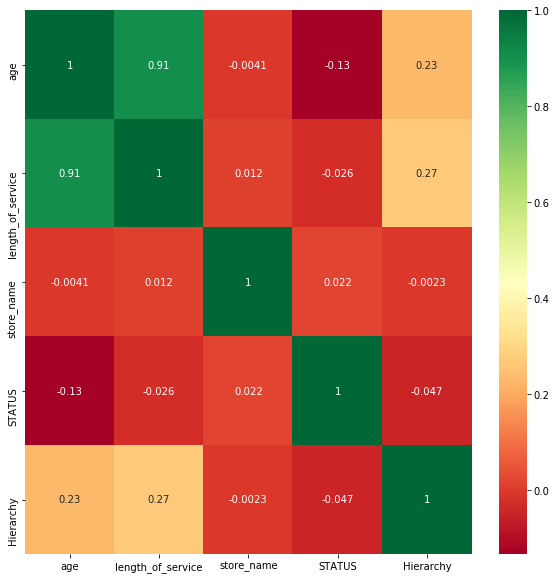

In [86]:
#Looking at the co-relation map to find any highly impacting feature that may introduce bias to the model
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [87]:
# Age and length of services are highly co-related and will adversely affect our model performance, hence we will remove
# the age

df = df.drop('age', axis=1)

In [88]:
# converting the gender_short to binary form (Male:1, Female:0)
df['gender_short'] = df['gender_short'].map({'M': 1, 'F': 0})

In [89]:
#Creating dummy columns for the ordinal and categorical variables
dummy_cols = ['gender_short', 'BUSINESS_UNIT', 'Service_to', 'city_name']
df = pd.get_dummies(df, columns=dummy_cols)

In [90]:
###########if anything has to be changed, change from here, like taking dummy variable for the gender_short, busineess_unit and 
###########service_to
#Defining input and output variables for the model
y = df['STATUS']
X = df.drop('STATUS', axis=1)

In [91]:
# Random state being signified so that we get same values in training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12)

In [92]:
# Fitting in SMOTE oversampling to deal with under-representation of non-active employees
X_smote, y_smote = SMOTE().fit_sample(x_train, y_train)

In [93]:
#Fitting in Random Over sampling technique
ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_sample(x_train, y_train)

In [94]:
# Now we will try rescale all three sampled input dataset (original, SMOTE sampled and Random oversmapled)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [95]:
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
X_ros = sc.fit_transform(X_ros)
X_smote = sc.fit_transform(X_smote)

In [106]:
# Now we will start creating the models and train separately on all three sampled data and test on test data
# We will be training 3 models each on three datasets.

#random forest training with all three types of sampled data
model1 = RandomForestClassifier(n_estimators = 100)
model1.fit(X_smote, y_smote)

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_ros, y_ros)

model3 = RandomForestClassifier(n_estimators = 100)
model3.fit(x_train, y_train)

#K-nearest neighbor classifier with all three types of sampled data
model4 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model4.fit(X_smote, y_smote)

model5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model5.fit(X_ros, y_ros)

model6 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model6.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
#Now we will record the prediction score for the models and then make a confusion matrix with test score

Predic_1 = model1.predict(x_test)
Predic_2 = model2.predict(x_test)
Predic_3 = model3.predict(x_test)
Predic_4 = model4.predict(x_test)
Predic_5 = model5.predict(x_test)
Predic_6 = model6.predict(x_test)

#Creating the confusion metrics for accuracy for each model
cm_1 = confusion_matrix(y_test,Predic_1)
accuracy_1 = (cm_1[0,0]+cm_1[1,1])/len(y_test)

cm_2 = confusion_matrix(y_test,Predic_2)
accuracy_2 = (cm_2[0,0]+cm_2[1,1])/len(y_test)

cm_3 = confusion_matrix(y_test,Predic_3)
accuracy_3 = (cm_3[0,0]+cm_3[1,1])/len(y_test)

cm_4 = confusion_matrix(y_test,Predic_4)
accuracy_4 = (cm_4[0,0]+cm_4[1,1])/len(y_test)

cm_5 = confusion_matrix(y_test,Predic_5)
accuracy_5 = (cm_5[0,0]+cm_5[1,1])/len(y_test)

cm_6 = confusion_matrix(y_test,Predic_6)
accuracy_6 = (cm_6[0,0]+cm_6[1,1])/len(y_test)

In [108]:
#Now, we will try calculate both F-1 score and accuracy for the models
print("\nFor Random Forest: SMOTE sampled data:")
print("F1 Score: {}".format(f1_score(y_test,Predic_1)))
print("Accuracy:",accuracy_1*100,'%')

print("\nFor Random Forest: Random sampled data:")
print("F1 Score: {}".format(f1_score(y_test,Predic_1)))
print("Accuracy:",accuracy_2*100,'%')

print("\nFor Random Forest: Normal Training data:")
print("F1 Score: {}".format(f1_score(y_test,Predic_3)))
print("Accuracy:",accuracy_3*100,'%')

print("\nFor KNN: SMOTE sampled data:")
print("F1 Score: {}".format(f1_score(y_test,Predic_4)))
print("Accuracy:",accuracy_4*100,'%')

print("\nFor KNN: Random sampled data:")
print("F1 Score: {}".format(f1_score(y_test,Predic_5)))
print("Accuracy:",accuracy_5*100,'%')

print("\nFor KNN: Normal Training data:")
print("F1 Score: {}".format(f1_score(y_test,Predic_6)))
print("Accuracy:",accuracy_6*100,'%')


For Random Forest: SMOTE sampled data:
F1 Score: 0.9458068637541258
Accuracy: 89.74892588614392 %

For Random Forest: Random sampled data:
F1 Score: 0.9458068637541258
Accuracy: 95.73039742212674 %

For Random Forest: Normal Training data:
F1 Score: 0.9334914304193166
Accuracy: 87.57384532760473 %

For KNN: SMOTE sampled data:
F1 Score: 0.8826617319385174
Accuracy: 79.14205155746508 %

For KNN: Random sampled data:
F1 Score: 0.9401996922306123
Accuracy: 88.78222341568205 %

For KNN: Normal Training data:
F1 Score: 0.9763215859030837
Accuracy: 95.3813104189044 %


Text(0, 0.5, 'ACCURACY')

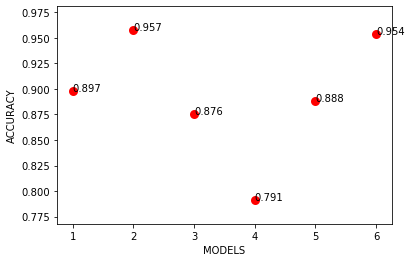

In [109]:
# Comparing the Accuracies of various models
ACCURACY = np.vstack((accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6))
number = np.array([1,2,3,4,5,6])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(number, ACCURACY, color = 'r', marker = 'o', linewidths = 3)
for j in range(0,len(ACCURACY)):
       ax.annotate('%0.3f' % (ACCURACY[j]),(number[j], ACCURACY[j]))

plt.xlabel('MODELS')    
plt.ylabel('ACCURACY')